**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import glob # used to search for files that match a specific file pattern or name
import re # provides regular expression support
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import skew, kurtosis

**Measures of Dispersion**

### Data Survey (EDA) and Preprocessing

**Download the latest version of FIFA23 Dataset**

In [2]:
# Download latest version 
path = kagglehub.dataset_download("bryanb/fifa-player-stats-database")

print("Path to dataset files:", path)

# Next, we move the downloaded files manually to the desired location (dataset folder)

Path to dataset files: C:\Users\ZhouZhou\.cache\kagglehub\datasets\bryanb\fifa-player-stats-database\versions\35


**Reading the csv files and merging them into one csv**

In [3]:
# Get all CSV files
csv_files = glob.glob("dataset/*.csv")  

# Create a DataFrame list containing all files
dfs = [pd.read_csv(file) for file in csv_files]

# Concatenate the elements of that list
df = pd.concat(dfs, ignore_index=True)

**A quick data survey (EDA)**

In [4]:
# .shape attribute to find the number of rows and columns
print(f"FIFA23 Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

FIFA23 Dataset has 122012 rows and 66 columns


In [5]:
# .info() method to return information about the DataFrame (column names, their counts, types,...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122012 entries, 0 to 122011
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        122012 non-null  int64  
 1   Name                      122012 non-null  object 
 2   Age                       122012 non-null  int64  
 3   Photo                     122012 non-null  object 
 4   Nationality               122012 non-null  object 
 5   Flag                      122012 non-null  object 
 6   Overall                   122012 non-null  int64  
 7   Potential                 122012 non-null  int64  
 8   Club                      120091 non-null  object 
 9   Club Logo                 122012 non-null  object 
 10  Value                     122012 non-null  object 
 11  Wage                      122012 non-null  object 
 12  Special                   122012 non-null  int64  
 13  Preferred Foot            122012 non-null  o

In [6]:
# .describe() method to return a summary statistics of the numerical values
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Kit Number
count,122012.000000,122012.000000,122012.000000,122012.000000,122012.000000,122012.000000,122012.000000,122012.000000,104235.000000,104352.000000,...,56950.000000,104352.000000,104237.000000,104352.000000,104352.000000,104352.000000,104352.000000,104352.000000,47402.000000,17625.000000
mean,220460.777719,24.557617,66.116521,71.719364,1601.608202,1.128389,2.954791,2.375635,20.749796,50.590070,...,45.219982,47.940154,45.872588,16.239133,16.041676,15.937998,16.062740,16.339160,47.318130,25.037957
std,35391.841183,4.821276,7.222327,6.096125,273.130997,0.424745,0.667094,0.769092,17.171366,18.202011,...,21.095830,21.624344,21.280654,17.393988,16.638305,16.323240,16.811369,17.677574,20.156901,19.154116
min,2.000000,15.000000,28.000000,38.000000,571.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,204024.000000,21.000000,61.000000,68.000000,1456.000000,1.000000,3.000000,2.000000,9.000000,39.000000,...,25.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,30.000000,11.000000
50%,228086.500000,24.000000,66.000000,72.000000,1634.000000,1.000000,3.000000,2.000000,18.000000,55.000000,...,50.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,52.000000,22.000000
75%,242979.250000,28.000000,71.000000,76.000000,1792.000000,1.000000,3.000000,3.000000,27.000000,64.000000,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,64.000000,32.000000
max,271340.000000,54.000000,94.000000,95.000000,2349.000000,5.000000,5.000000,5.000000,99.000000,94.000000,...,94.000000,93.000000,95.000000,91.000000,92.000000,95.000000,93.000000,93.000000,94.000000,99.000000


In [7]:
# .head() method to return the first few rows (default is 5)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Kit Number
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,27.0,25.0,31.0,33.0,37.0,ST,88.0,NaN,NaN,NaN
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,11.0,11.0,14.0,8.0,11.0,CDM,84.0,NaN,NaN,NaN
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,4.0,2.0,4.0,2.0,4.0,CDM,85.0,NaN,NaN,NaN
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,5.0,7.0,14.0,15.0,9.0,LB,84.0,NaN,NaN,NaN
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,5.0,6.0,2.0,4.0,3.0,CAM,85.0,NaN,NaN,NaN


In [8]:
# .tail() method to return the last few rows (default is 5)
df.tail()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Kit Number
122007,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€218K,NaN,35.0
122008,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€188K,NaN,21.0
122009,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€142K,NaN,12.0
122010,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€214K,NaN,40.0
122011,256376,21 F. Jakobsson,20,https://cdn.sofifa.net/players/256/376/21_60.png,Sweden,https://cdn.sofifa.net/flags/se.png,50,61,IFK Norrköping,https://cdn.sofifa.net/teams/702/30.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€131K,NaN,30.0


In [9]:
# .columns attribute to return a list containing all columns
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness', 'Kit Number'],
      dty

In [10]:
# detect empty spaces in each column
df.eq(" ").sum()

ID                     0
Name                   0
Age                    0
Photo                  0
Nationality            0
                      ..
Best Position          0
Best Overall Rating    0
Release Clause         0
DefensiveAwareness     0
Kit Number             0
Length: 66, dtype: int64

In [11]:
# count of all empty spaces
df.eq(" ").sum().sum()

0

**As we can see, there are no empty spaces in the columns**

**Data Cleaning**

In [12]:
# detect duplicates and their counts (if any)
df.duplicated().sum()

374

**As we can see, there are duplicated rows to be removed:**

In [13]:
# use .drop_duplicates() to remove the duplicated values 
# re-write the DataFrame
df = df.drop_duplicates()

**The Fraction Chart of Missing Values (relative proportion)**

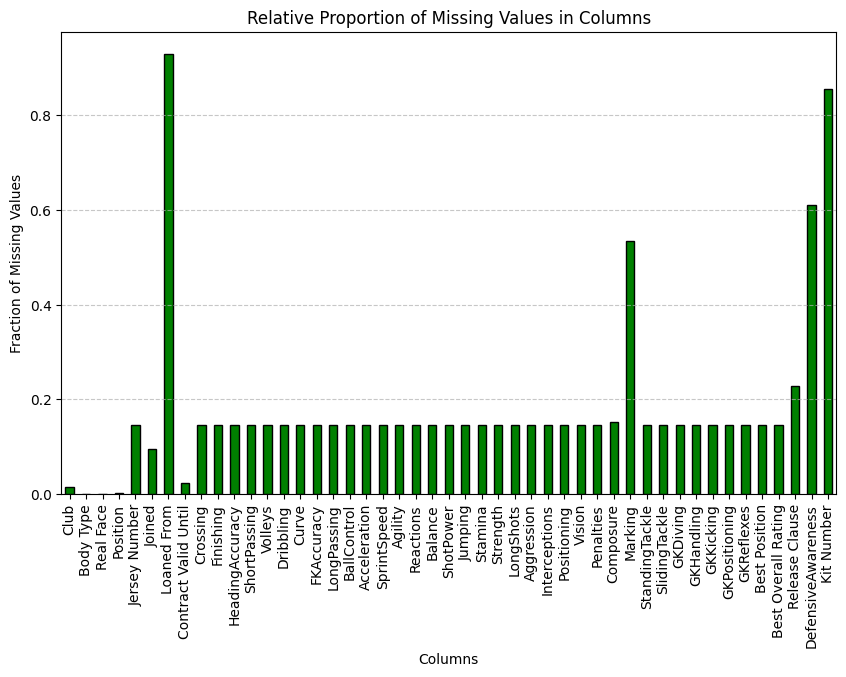

In [14]:
# count missing values in each column
mv = df.isnull().sum() # count of missing values per column
columns_mv = mv[mv > 0]/df.shape[0] # the fraction of missing values (0 to 1)

# Plot the bar chart of columns_mv (columns with missing values)
plt.figure(figsize=(10, 6))
columns_mv.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Columns')
plt.ylabel('Fraction of Missing Values')
plt.title('Relative Proportion of Missing Values in Columns')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

**As we can see, there are several columns with missing values. We will handle them in the next step.**

**Handle Missing Values & Fix Mixed Data Types**
- Identify mixed data types and convert where possible
- Fill missing values: Categorical → Mode (most common value) and Numeric → Median (to avoid outliers affecting mean)
- Saves the cleaned dataset as `"cleaned_data.csv"`

**Mixed Data Types:**

There are **5 columns with mixed data types** (numbers and characters) &rarr; ['Value', 'Wage', 'Weight', 'Height', 'Best Overall Rating']. These columns should be converted to numeric by removing the special characters:
- `Weight` and `Height` will be converted to raw numeric in SI units (kg, cm)
- The Euro symbol (€) will be removed from `Wage` and `Value`
- `Best Overall Rating` will be converted to raw numeric by treating the edge cases

One more column `Position` with edge case also needs to be converted to categorical

**Usage of Lambda Function**

In [15]:
# Convert 'Value' and 'Wage' to Numeric (€)
df['Value'] = df['Value'].apply(lambda x: float(x.replace('€', '').replace(',', '').replace('M', '')) * 1_000_000 if 'M' in x else 
                                          float(x.replace('€', '').replace(',', '').replace('K', '')) * 1_000 if 'K' in x else 
                                          float(x.replace('€', '').replace(',', '')))
df['Wage'] = df['Wage'].apply(lambda x: float(x.replace('€', '').replace(',', '').replace('M', '')) * 1_000_000 if 'M' in x else 
                                        float(x.replace('€', '').replace(',', '').replace('K', '')) * 1_000 if 'K' in x else 
                                        float(x.replace('€', '').replace(',', '')))

# Convert 'Weight' to kg 
df['Weight'] = df['Weight'].apply(lambda x: float(x.replace('lbs', '')) * 0.453592 if 'lbs' in x else 
                                            float(x.replace('kg', '')) if 'kg' in x else float(x))

# Convert 'Height' to cm
df['Height'] = df['Height'].apply(lambda x: int(x.split("'")[0]) * 30.48 + int(x.split("'")[1]) * 2.54 if "'" in x else 
                                            float(x.replace('cm', '')) if 'cm' in x else float(x))

# Convert 'Best Overall Rating' to raw numeric
df['Best Overall Rating'] = df['Best Overall Rating'].apply(
    lambda x: float(re.findall(r'\d+', x)[-1]) if isinstance(x, str) else float(x)
)

# Convert 'Position' to categorical keeping only characters after >
df["Position"] = df["Position"].apply(lambda x: x.split(">")[-1] if isinstance(x, str) and ">" in x else x)

**Handle Missing Values:**
- For the missing values in categorical columns:
    - If the proportion of missing values in a column is less than 30%, replace them with mode
    - Otherwise (if more than 30% are missing), drop that column
- For the missing values in numerical columns:
    - If the proportion of missing values in a column is less than 30%, replace them with median
    - Otherwise (if more than 30% are missing), drop that column

In [16]:
# Define missing value threshold (30%)
threshold = 0.3  # 30%

# Loop through columns and handle missing values
for column in df.columns:
    missing_ratio = df[column].isna().sum() / len(df)  # Calculate missing percentage
    
    if missing_ratio < threshold:  # Less than 30% missing
        if df[column].dtype == "object":  # Categorical column
            mode_value = df[column].mode()[0]  # Get most frequent value
            df[column].fillna(mode_value, inplace=True)
        else:  # Numerical column
            median_value = df[column].median()  # Get median value
            df[column].fillna(median_value, inplace=True)
    
    else:  # 30% or more missing -> drop the column
        df.drop(columns=[column], inplace=True)

# Save cleaned DataFrame (optional)
df.to_csv("cleaned_data.csv", index=False)

In [17]:
# To check if the data is cleaned and missing/NaN values are filled/removed
df.isna().sum().sum()

0

**After data preprocessing, we select categorical and numerical columns for further analysis**

In [18]:
# .select_dtypes() method to select numerical and non-numerical (categorical) columns

df_num = df.select_dtypes(include="number") # select numerical
df_cat = df.select_dtypes(exclude="number") # select categorical

In [19]:
# print numerical columns and the first 5 rows of numerical data
print("Numerical data:")
print(df_num.columns)
df_num.head()

Numerical data:
Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Overall Rating'],
      dtype='object')


,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating
0,176580,29,92,92,83000000.0,525000.0,2291,5.0,4.0,4.0,...,85.0,83.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,88.0
1,178518,28,86,86,37500000.0,130000.0,2290,3.0,3.0,3.0,...,63.0,85.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,84.0
2,181872,29,87,87,41500000.0,180000.0,2285,4.0,4.0,3.0,...,84.0,86.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,85.0
3,197445,24,86,89,41500000.0,140000.0,2279,4.0,4.0,3.0,...,80.0,79.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,84.0
4,195864,23,88,94,71500000.0,225000.0,2271,4.0,4.0,5.0,...,76.0,83.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,85.0


In [20]:
# print categorical columns and the first 5 rows of categorical data
print("Categorical data:")
print(df_cat.columns)
df_cat.head()

Categorical data:
Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo',
       'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Contract Valid Until', 'Best Position', 'Release Clause'],
      dtype='object')


,Name,Photo,Nationality,Flag,Club,Club Logo,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Best Position,Release Clause
0,L. Suárez,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,Right,High/ Medium,Normal (170-185),Yes,ST,"Jul 11, 2014",2021,ST,€1.1M
1,R. Nainggolan,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,Roma,https://cdn.sofifa.com/teams/52/light_30.png,Right,High/ High,Stocky (170-185),No,LF,"Jan 7, 2014",2021,CDM,€1.1M
2,A. Vidal,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,Right,High/ High,Normal (170-185),Yes,LDM,"Jul 28, 2015",2019,CDM,€1.1M
3,D. Alaba,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,Left,High/ Medium,Lean (170-185),Yes,LB,"Feb 10, 2010",2021,LB,€1.1M
4,P. Pogba,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,Right,High/ Medium,Lean (185+),Yes,LDM,"Aug 9, 2016",2021,CAM,€1.1M


### Data Analysis, Visualization, and Interpretation

#### Univariate

**Frequency Table for `Nationality`**

In [21]:
# Frequency Table for Preferred Foot
nationality_freq = df['Nationality'].value_counts()
print("\nFrequency Table for Nationality:")

# Show the top 10 most frequent 
nationality_freq.head(10)


Frequency Table for Nationality:


England        11793
Germany         7378
Spain           7339
France          6625
Argentina       6325
Brazil          5448
Italy           4321
Colombia        3031
Netherlands     3031
Japan           2657
Name: Nationality, dtype: int64

**Pie Chart of the top 10 `Nationality`**

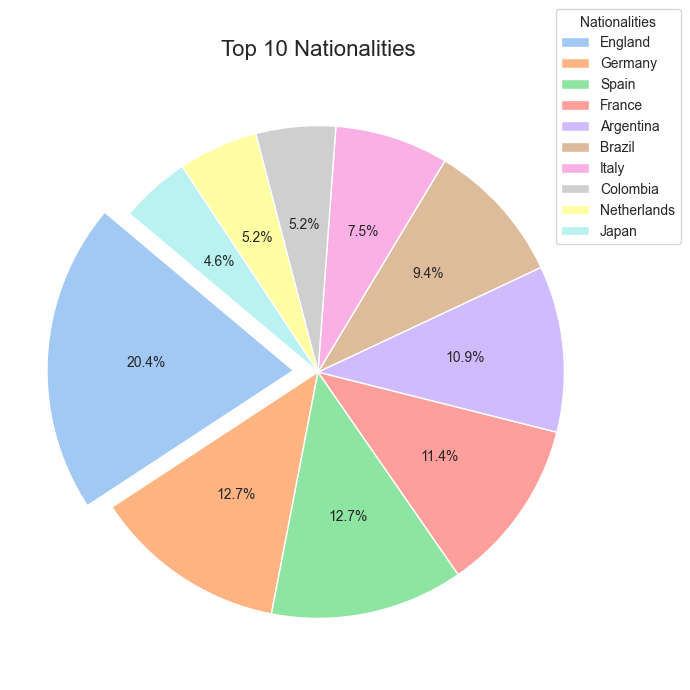

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Frequency table for Nationality
nationality_freq = df['Nationality'].value_counts()

# Get the top 10 most frequent nationalities
top_10_nationalities = nationality_freq.head(10)

# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot the pie chart
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Explode the first slice
plt.pie(top_10_nationalities, labels=None, autopct='%1.1f%%', startangle=140, explode=explode)

# Add a legend
plt.legend(top_10_nationalities.index, title="Nationalities", loc="upper right", bbox_to_anchor=(1.1, 1.1))

# Add a title
plt.title('Top 10 Nationalities', fontsize=16)

# Show the plot
plt.show()

**Frequency Table for `Preferred Foot`**

In [23]:
# Frequency Table for Preferred Foot
foot_freq = df['Preferred Foot'].value_counts()
print("\nFrequency Table for Preferred Foot:")
foot_freq


Frequency Table for Preferred Foot:


Right    92874
Left     28764
Name: Preferred Foot, dtype: int64

**Bar Plot of `Preferred Foot`**


Frequency Table for Preferred Foot:
Right    92874
Left     28764
Name: Preferred Foot, dtype: int64

Percentage Table for Preferred Foot:
Right    76.352784
Left     23.647216
Name: Preferred Foot, dtype: float64


C:\Users\ZhouZhou\AppData\Local\Temp\ipykernel_4212\2694335536.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=foot_percent.index, y=foot_percent.values, palette="viridis")


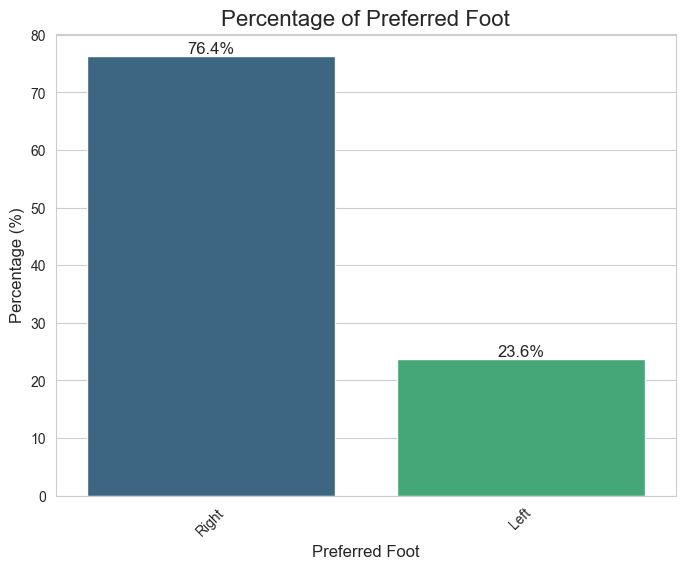

In [24]:
# Frequency table for Preferred Foot
foot_freq = df['Preferred Foot'].value_counts()

# Calculate percentages
total_players = df.shape[0]  # Total number of players
foot_percent = (foot_freq / total_players) * 100  # Convert to percentages

# Print the frequency table and percentages
print("\nFrequency Table for Preferred Foot:")
print(foot_freq)
print("\nPercentage Table for Preferred Foot:")
print(foot_percent)

# Set seaborn style and palette
sns.set_style("whitegrid")

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=foot_percent.index, y=foot_percent.values, palette="viridis")

# Add annotations (percentages on top of bars)
for i, value in enumerate(foot_percent.values):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', fontsize=12)  # Adjust text placement

# Add title and labels
plt.title('Percentage of Preferred Foot', fontsize=16)
plt.xlabel('Preferred Foot', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Frequency Table for Top 10 Most Valuable Players (top 10 in `Value` column)**

In [25]:
# Frequency Table for Most Valuable Players
top_10_players = df.sort_values(by='Value', ascending=False).head(10)
print("\nFrequency Table for Top 10 Players:")
top_10_players


Frequency Table for Top 10 Players:


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause
87724,231747,K. Mbappé,22,https://cdn.sofifa.com/players/231/747/22_60.png,France,https://cdn.sofifa.com/flags/fr.png,91,95,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,34.0,32.0,13.0,5.0,7.0,11.0,6.0,ST,92.0,€373.5M
104427,231747,K. Mbappé,23,https://cdn.sofifa.net/players/231/747/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,95,Paris Saint-Germain,https://cdn.sofifa.net/teams/73/30.png,...,55.0,52.0,11.0,11.0,11.0,11.0,11.0,CB,67.0,€366.7M
104532,239085,E. Haaland,21,https://cdn.sofifa.net/players/239/085/23_60.png,Norway,https://cdn.sofifa.net/flags/no.png,88,94,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,55.0,52.0,11.0,11.0,11.0,11.0,11.0,CB,67.0,€303.4M
87893,239085,E. Haaland,20,https://cdn.sofifa.com/players/239/085/22_60.png,Norway,https://cdn.sofifa.com/flags/no.png,88,93,Borussia Dortmund,https://cdn.sofifa.com/teams/22/30.png,...,43.0,30.0,7.0,14.0,13.0,11.0,7.0,ST,90.0,€244.1M
87681,202126,H. Kane,27,https://cdn.sofifa.com/players/202/126/22_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,90,90,Tottenham Hotspur,https://cdn.sofifa.com/teams/18/30.png,...,36.0,38.0,8.0,10.0,11.0,14.0,11.0,ST,90.0,€246.1M
87706,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,32.0,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M
87645,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M
102250,230621,G. Donnarumma,22,https://cdn.sofifa.com/players/230/621/22_60.png,Italy,https://cdn.sofifa.com/flags/it.png,89,93,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,14.0,16.0,91.0,83.0,79.0,85.0,90.0,GK,89.0,€230M
87659,228702,F. de Jong,24,https://cdn.sofifa.com/players/228/702/22_60.png,Netherlands,https://cdn.sofifa.com/flags/nl.png,87,92,FC Barcelona,https://cdn.sofifa.com/teams/241/30.png,...,76.0,77.0,7.0,13.0,10.0,10.0,9.0,CM,89.0,€253.9M
87675,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,42.0,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M


**Bar plot of Most Valuable Players**

C:\Users\ZhouZhou\AppData\Local\Temp\ipykernel_4212\585427745.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Value', y='Name', data=top_10_players, palette="viridis")


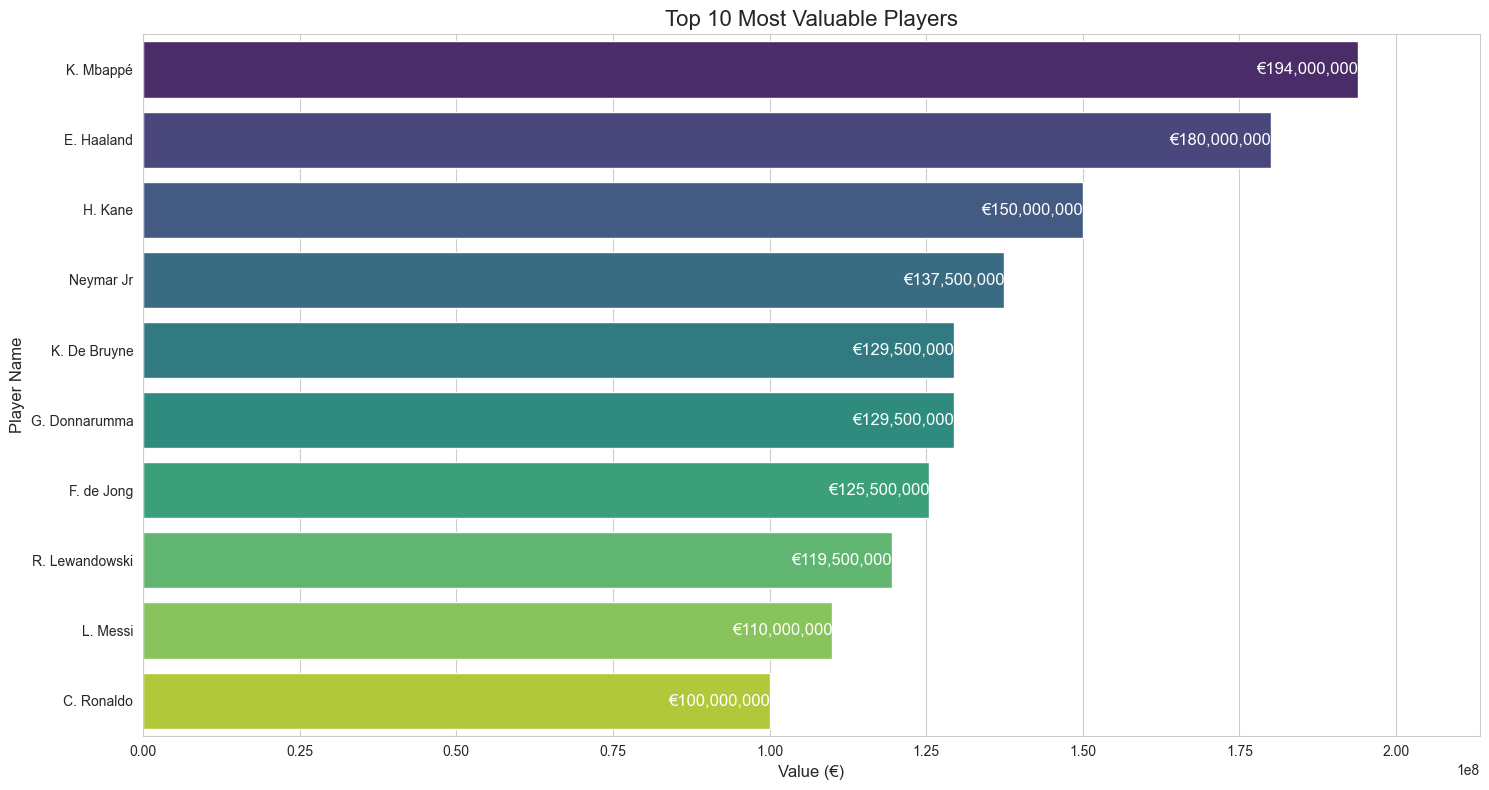

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Name': ['K. Mbappé', 'E. Haaland', 'H. Kane', 'Neymar Jr', 'K. De Bruyne', 'G. Donnarumma', 'F. de Jong', 'R. Lewandowski', 'L. Messi', 'C. Ronaldo'],
    'Value': [194000000, 180000000, 150000000, 137500000, 129500000, 129500000, 125500000, 119500000, 110000000, 100000000]
}
df_top_10 = pd.DataFrame(data)

# Sort the DataFrame by 'Value' in descending order and select the top 10 players
top_10_players = df_top_10.sort_values(by='Value', ascending=False).head(10)

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# Plot the bar chart
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Value', y='Name', data=top_10_players, palette="viridis")

# Add annotations (values inside the bars)
for i, value in enumerate(top_10_players['Value']):
    ax.text(value - 0.1, i, f'€{value:,.0f}', va='center', ha='right', fontsize=12, color='white')  # Place text inside bars

# Adjust x-axis limits to fit all bars and annotations
plt.xlim(0, top_10_players['Value'].max() * 1.1)  # Add 10% padding to the max value

# Add title and labels
plt.title('Top 10 Most Valuable Players', fontsize=16)
plt.xlabel('Value (€)', fontsize=12)
plt.ylabel('Player Name', fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()

**Centrality Measures for `Overall` Rating**

In [27]:
# mean rating
rating_avg = df["Overall"].mean().round(2)
print("Overall Rating Mean: ", rating_avg)

# median rating
rating_med = df["Overall"].median().round(2)
print("Overall Rating Median: ", rating_med)

# mode rating
rating_mode = df["Overall"].mode()[0].round(2)
print("Overall Rating Mode: ", rating_mode)

Overall Rating Mean:  66.1
Overall Rating Median:  66.0
Overall Rating Mode:  65


**Dispersion Measures for `Overall` Rating**

In [28]:
# rating variance
rating_var = df["Overall"].var().round(2)
print("Overall Rating Variance: ", rating_var)

# rating standard deviation (std)
rating_std = df["Overall"].std().round(2)
print("Overall Rating std: ", rating_std)

# rating IQR
rating_iqr = (df["Overall"].quantile(0.75) - df["Overall"].quantile(0.25)).round(2)
print("Overall Rating IQR: ", rating_iqr)

Overall Rating Variance:  52.07
Overall Rating std:  7.22
Overall Rating IQR:  10.0


**Distribution of `Overall` Rating**

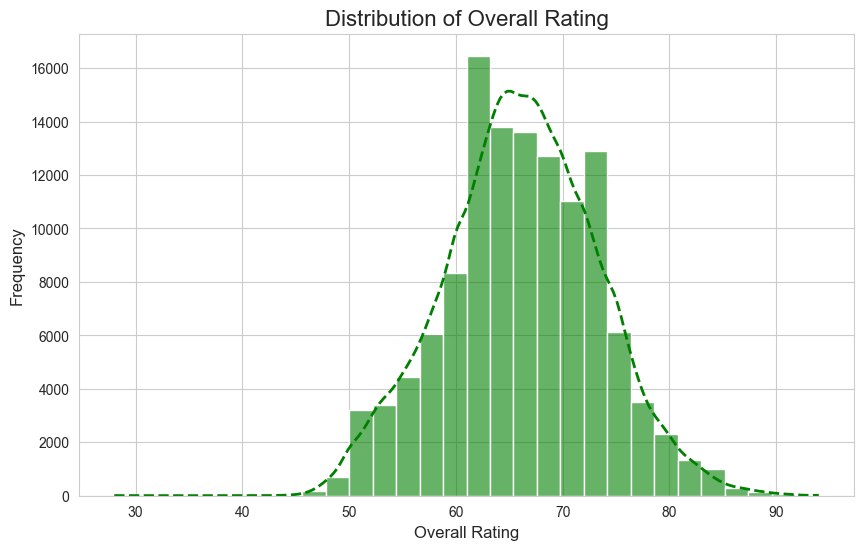

In [29]:
# Set seaborn style
sns.set_style("whitegrid")

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall'], color='green', bins=30, kde=True, alpha=0.6, line_kws={'color': 'red', 'linewidth': 2, 'linestyle': '--'})

# Add title and labels
plt.title('Distribution of Overall Rating', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

**It is visually apparent that `Overall` Rating follows a normal distribution. To verify this further, We use QQ Plot:**

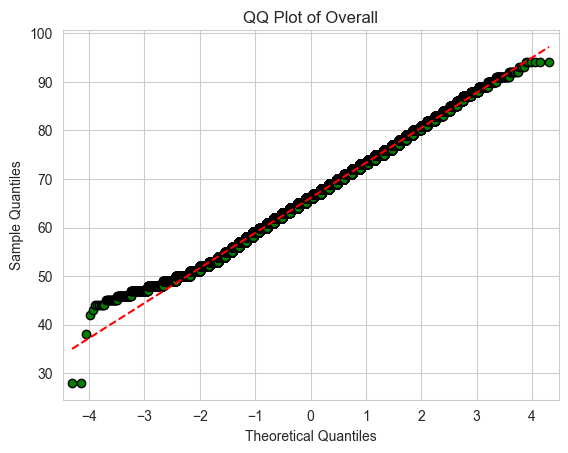

In [30]:
# Create QQ plot
sm.qqplot(df['Overall'], line='s')  # 's' for standardized line

# Customize colors using Matplotlib
# Change the color of the points (markers)
plt.gca().get_lines()[0].set_markerfacecolor('green')  # Fill color of markers
plt.gca().get_lines()[0].set_markeredgecolor('black')  # Edge color of markers
plt.gca().get_lines()[0].set_marker('o')  # Marker style (e.g., 'o' for circles)

# Change the color of the reference line
plt.gca().get_lines()[1].set_color('red')  # Color of the reference line
plt.gca().get_lines()[1].set_linestyle('--')  # Line style (e.g., '--' for dashed)

# Add title and labels
plt.title('QQ Plot of Overall')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

**QQ Plot also confirms that `Overall` Rating follows a normal distribution**

**Total `Wage` by `Nationality`**

In [31]:
# Groupby and Aggregation: Total Wage by Nationality
nationality_total_wage = df.groupby('Nationality')['Wage'].sum().sort_values(ascending=False)
print("\nTotal Wage by Nationality:")
print(nationality_total_wage.head(10))


Total Wage by Nationality:
Nationality
England        119433900.0
Spain          114213400.0
Brazil         101581300.0
France          95242950.0
Germany         79862250.0
Argentina       72376150.0
Italy           58001850.0
Portugal        35611550.0
Netherlands     33428300.0
Belgium         30636550.0
Name: Wage, dtype: float64


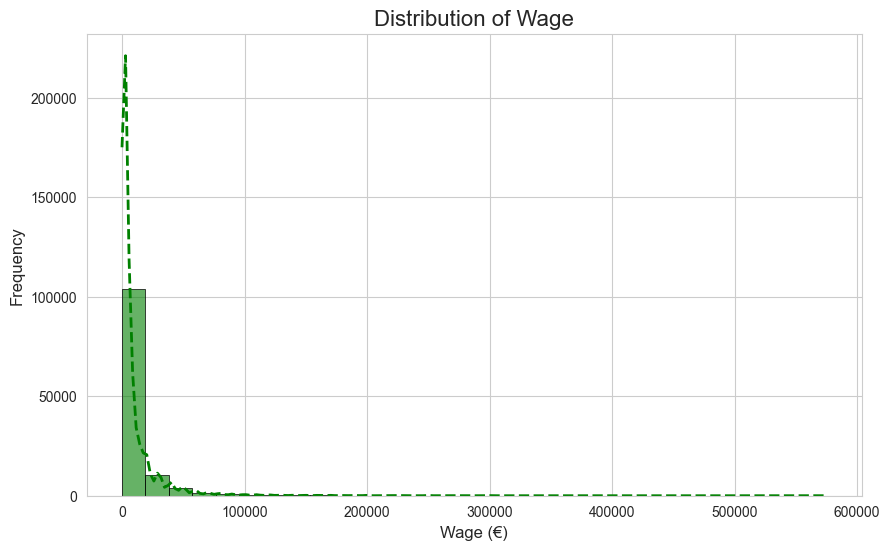

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("whitegrid")

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Wage'], bins=30, kde=True, color='green', alpha=0.6, edgecolor='black', linewidth=0.5, line_kws={'color': 'red', 'linewidth': 2, 'linestyle': '--'})

# Add title and labels
plt.title('Distribution of Wage', fontsize=16)
plt.xlabel('Wage (€)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

**As we can see, the distribution of `Wage` is far beyond normal or other known distributions. For a better observation, we filter out the outliers and plot a new distribution**

**Histogram of `Wage` in the absence of outliers**

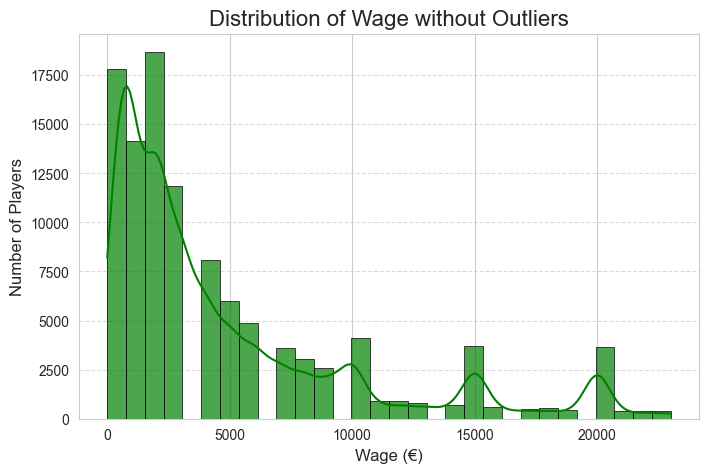

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate quartiles and bounds for the outliers
Q1_wage = df["Wage"].quantile(0.25)
Q3_wage = df["Wage"].quantile(0.75)
IQR_wage = Q3_wage - Q1_wage
lb_wage = Q1_wage - 1.5 * IQR_wage
ub_wage = Q3_wage + 1.5 * IQR_wage

# Filter out the outliers using a logical expression
df_adjusted = df[(df["Wage"] >= lb_wage) & (df["Wage"] <= ub_wage)]

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the distribution plot
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
sns.histplot(df_adjusted['Wage'], color='green', bins=30, kde=True, alpha=0.7, edgecolor='black', linewidth=0.5)

# Labels and Title
plt.xlabel("Wage (€)", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.title("Distribution of Wage without Outliers", fontsize=16)

# Show Grid for Better Readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the Plot
plt.show()

**We can see that, even after removing the outliers, the distribution of `Wage` is still right-skewed and except some bumpiness on the right tail, it looks similar to Poisson distribution with small $\lambda$ parameter**

**Analyzing the shape of Distribution for `Wage` using Skewness and Kurtosis**

In [34]:
skewness = skew(df["Wage"])
kurtosis_val = kurtosis(df["Wage"])

print(f"Wage Skewness is: {skewness.round(2)}")
print(f"Wage Kurtosis is: {kurtosis_val.round(2)}")

Wage Skewness is: 7.2
Wage Kurtosis is: 90.26


**Wage Skewness = `7.20`** and **Wage Kurtosis = `90.26`** indicate a highly skewed and heavy-tailed distribution.
- **Skewness (7.20)** – A highly positive skew means that most players have relatively low wages, while a few players earn extremely high wages, creating a long right tail.
- **Kurtosis (90.26)** – A very high kurtosis suggests that the wage distribution has extreme outliers, with a sharp peak and heavy tails. This indicates that wages are highly concentrated for most players, but some have exceptionally high wages.

#### Bivariate

**Groupby and Aggregation**

**Average `Overall` Rating by `Club`**

In [35]:
# Groupby and Aggregation: Average Overall Rating by Club
club_avg_overall = df.groupby('Club')['Overall'].mean().sort_values(ascending=False)
print("\nAverage Overall Rating by Club:")
print(club_avg_overall.head(10))


Average Overall Rating by Club:
Club
111648               85.000000
Messina              80.000000
Juventus             79.612440
Siena                79.000000
Real Madrid          78.220238
FC Bayern München    78.161765
AFC Richmond         78.066667
Napoli               77.913978
FC Barcelona         77.793522
Inter                77.361991
Name: Overall, dtype: float64


**Bar Plot of Average `Overall` Rating by `Club`**

C:\Users\ZhouZhou\AppData\Local\Temp\ipykernel_4212\905044736.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=club_avg_overall.head(10).index, y=club_avg_overall.head(10).values, palette=colors)


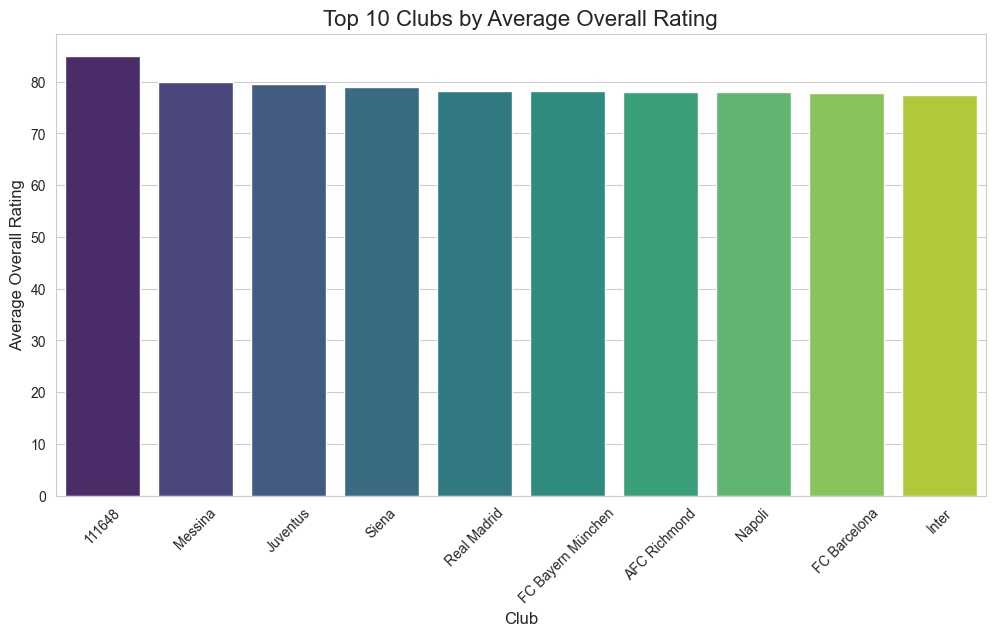

In [36]:
# Assuming club_avg_overall is a Series with clubs as index and average overall ratings as values
plt.figure(figsize=(12, 6))

# Use seaborn's color palette
colors = sns.color_palette('viridis', n_colors=10)  # Use the 'husl' palette for 10 colors

# Plot the bar chart
sns.barplot(x=club_avg_overall.head(10).index, y=club_avg_overall.head(10).values, palette=colors)

# Add title and labels
plt.title('Top 10 Clubs by Average Overall Rating', fontsize=16)
plt.xlabel('Club', fontsize=12)
plt.ylabel('Average Overall Rating', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Scatter Plot of `Value` vs. `Wage`**

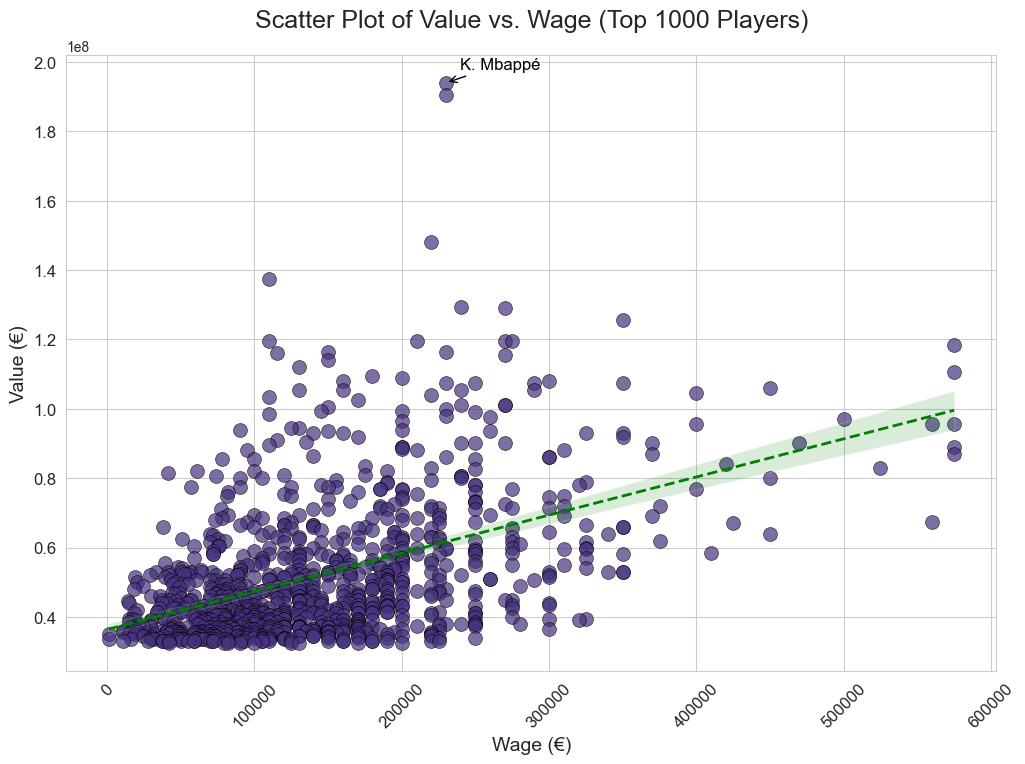

In [37]:
# Set seaborn style for better aesthetics
sns.set_style("whitegrid")
sns.set_palette("viridis")  # Use a vibrant color palette

# Sort the DataFrame by 'Value' and select the top 1000
df_select = df.sort_values(by='Value', ascending=False).head(1000)

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Wage', y='Value', data=df_select, s=100, alpha=0.7, edgecolor='black', linewidth=0.5)

# Add a regression line
sns.regplot(x='Wage', y='Value', data=df_select, scatter=False, color='green', line_kws={'linestyle': '--', 'linewidth': 2})

# Add title and labels
plt.title('Scatter Plot of Value vs. Wage (Top 1000 Players)', fontsize=18, pad=20)
plt.xlabel('Wage (€)', fontsize=14)
plt.ylabel('Value (€)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for specific data points (optional)
# Example: Annotate the player with the highest value
max_value_player = df_select.iloc[0]
plt.annotate(
    max_value_player['Name'],  # Text to display
    xy=(max_value_player['Wage'], max_value_player['Value']),  # Point to annotate
    xytext=(10, 10),  # Text position
    textcoords='offset points',  # Offset for text position
    fontsize=12,
    color='black',
    arrowprops=dict(arrowstyle='->', color='black')  # Arrow properties
)

# Show the plot
plt.show()

**We see that there is a stromg positive correlation between `Wage` and `Value`, as these values
are moving together almost linearly**

**Correlation coefficients between `Wage` and `Value`**

- Pearson correlation

In [38]:
p_corrcoef = float(df['Wage'].corr(df['Value']))
print("Pearson correlation between Wage and Value is: ", p_corrcoef)

Pearson correlation between Wage and Value is:  0.8088178570058616


- Spearman correlation

In [39]:
s_corrcoef = float(df['Wage'].corr(df['Value'], method="spearman"))
print("Spearman correlation between Wage and Value is: ", s_corrcoef)

Spearman correlation between Wage and Value is:  0.7477449963722307


**Crosstab Analysis**

1. `Preferred Foot` vs. `Position`

- This analysis will help us understand if certain positions are more likely to be occupied by left-footed or right-footed players.

In [40]:
# Crosstab between Position and Preferred Foot
# normalize="index" gives proportions for each "Left", "Right" column within their respective rows. 
foot_vs_pos = pd.crosstab(df["Position"], df["Preferred Foot"], normalize="index")
foot_vs_pos

Preferred Foot,Left,Right
Position,,
CAM,0.281049,0.718951
CB,0.117568,0.882432
CDM,0.130941,0.869059
CF,0.227848,0.772152
CM,0.175926,0.824074
GK,0.128022,0.871978
LAM,0.317241,0.682759
LB,0.876827,0.123173
LCB,0.426601,0.573399


**Stacked Bar Chart for `Preferred Foot` vs `Position`**

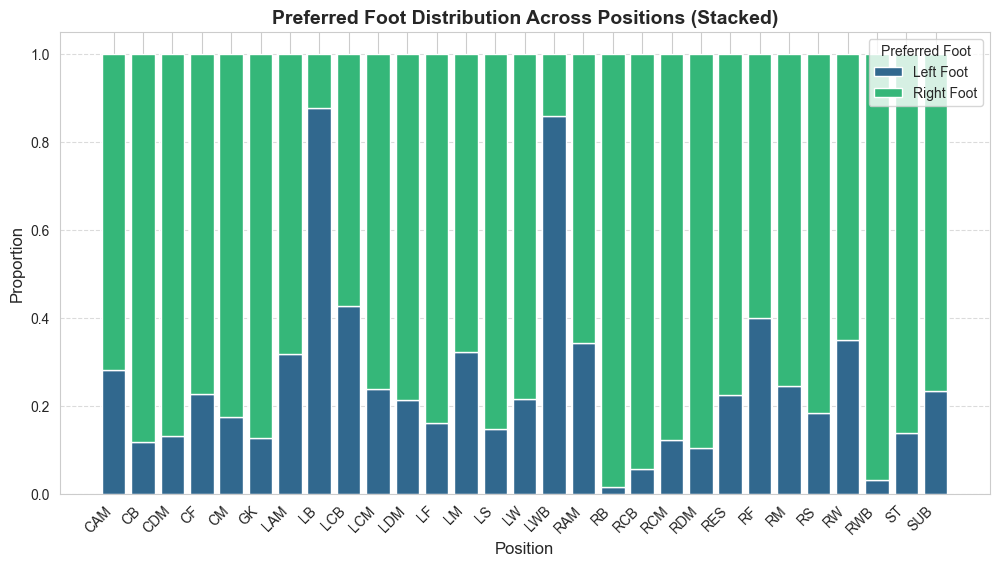

In [41]:
# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Define positions for bars
positions = np.arange(len(foot_vs_pos.index))

# Define colors using Seaborn palette
colors = sns.color_palette("viridis", n_colors=2)

# Plot the first layer (Left foot)
plt.bar(positions, foot_vs_pos["Left"], label="Left Foot", color=colors[0])

# Plot the second layer (Right foot) on top of Left foot
plt.bar(positions, foot_vs_pos["Right"], bottom=foot_vs_pos["Left"], label="Right Foot", color=colors[1])

# Customize labels and title
# Rotate x-axis labels to 45 degrees
plt.xticks(positions, foot_vs_pos.index, rotation=45, ha="right", fontsize=10)
plt.xlabel("Position", fontsize=12)  
plt.ylabel("Proportion", fontsize=12)  
plt.title("Preferred Foot Distribution Across Positions (Stacked)", fontsize=14, fontweight='bold')  
plt.legend(title="Preferred Foot", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for clarity

# Show the plot
plt.show()

**Hypothesis:**
- Left-Footed Players: Positions like LB and LW tend to have a higher proportion of left-footed players. This is common in football, as left-footed players are often preferred for these positions due to their ability to deliver crosses and cut inside effectively.

- Right-Footed Players: Positions like CM, RB, and ST are dominated by right-footed players. This is expected, as right-footed players are more common in general, and these positions often require strong passing and shooting with the dominant foot.

- Balanced Positions: Positions like RW and CB have a more balanced distribution, indicating that both left-footed and right-footed players can excel in these roles.

2. `Age Group` vs. `Overall Rating`
- This analysis will help us understand if there is a relationship between a player's age and their overall rating.

**Statistical Tests**

- Chi-squared test

In [42]:
# Perform the Chi-square test
chi2, p, dof, expected = st.chi2_contingency(foot_vs_pos)

# Display results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-square statistic: 5.932154550150522
P-value: 0.9999970068402815
Degrees of freedom: 28


In [43]:
# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: 'Preffered Foot' is dependent on 'Position'.")
else:
    print("Fail to reject the null hypothesis: No significant association between 'Preffered Foot' and 'Position'.")

Fail to reject the null hypothesis: No significant association between 'Preffered Foot' and 'Position'.


- Compute Cramér’s V

In [44]:
# Compute total sample size
n = df.shape[0]

# Compute number of categories (rows) and bestseller statuses (columns)
num_rows, num_cols = foot_vs_pos.shape

# Compute Cramér’s V
cramers_v = np.sqrt(chi2 / (n * (min(num_rows, num_cols) - 1)))

# Display result
print(f"Cramér's V: {cramers_v}")

# Interpretation:
# - 0.1 = Small effect
# - 0.3 = Medium effect
# - 0.5+ = Large effect

if cramers_v < 0.1:
    print("Cramér's V yields a weak association between the 2 variables.")
if 0.1 < cramers_v < 0.3:
    print("Cramér's V yields a moderate association between the 2 variables.")
if cramers_v > 0.5:
    print("Cramér's V yields a strong association between the 2 variables.")

Cramér's V: 0.006983475167800138
Cramér's V yields a weak association between the 2 variables.


**Observation:**
- High p-value indicates that the observed data (proportion of right/left foot) is likely to have occurred by chance.
- Contrary to our initial hypothesis, both Chi-squared test and Cramér’s V yield weak association between `Preffered Foot` and `Position`. In other words, there is not enough evidence to reject the null hypothesis which proposes that no statistical significance exists in a set of given observations.

**Correlation Heatmap for 10 Selected Numerical Variables in the Dataset**

C:\Users\ZhouZhou\AppData\Local\Temp\ipykernel_4212\178633852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_10.rename(columns={"International Reputation":"IR"}, inplace=True)


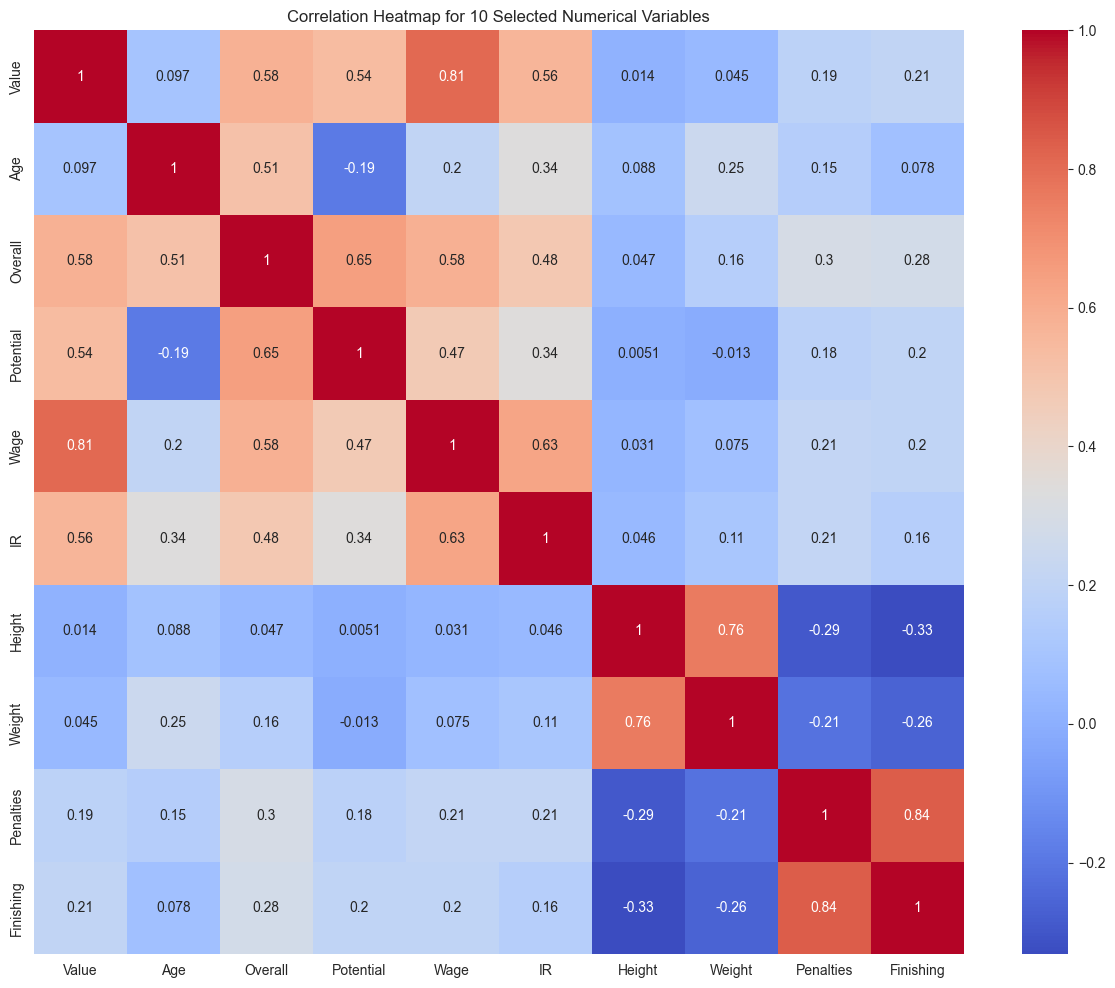

In [45]:
# Select 10 columns from df_num
df_num_10 = df_num[["Value", "Age", "Overall", "Potential", "Wage", 
                     "International Reputation", "Height", "Weight", "Penalties", "Finishing"]]

df_num_10.rename(columns={"International Reputation":"IR"}, inplace=True)

# Define the correlation matrix
correlation_matrix = df_num_10.corr()

# Set up the figsize
plt.figure(figsize=(15, 12))

# Plot heatmap for numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Add title
plt.title("Correlation Heatmap for 10 Selected Numerical Variables")
plt.show()

**A counter-intuitive Observation!**
- `Value` in football refers to an estimated monetary worth of a footballer, based on factors like their current performance, potential, age, league level, reputation, and market demand, essentially representing how much a club could theoretically sell them for in a transfer if they were to be put on the market. 
- `Finishing` is the act of scoring a goal by placing the ball in the net

My initial assumption was that `finishing` is strongly correlated with `Value`, meaning that the more a player scores a goal, the more valuable that player is. However, the relatively weak correlation coefficient of 0.21 disproves this belief!